In [1]:
from tensorflow.keras.layers import Dense ,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
class MyCallback(Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get("accuracy")>= 0.95):
           print("cancelling training ")
           self.model.stop_training = True

In [5]:
Cb = MyCallback()

In [6]:
model = Sequential([
         Flatten(input_shape=(28,28)),
         Dense(128,activation="relu"),
         Dense(10,activation="softmax")



])

C:\Users\RISHABH\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=[ "accuracy"])

In [8]:
history = model.fit(x_train,y_train,epochs=50,callbacks=[Cb])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7750 - loss: 0.6360
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8602 - loss: 0.3868
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8745 - loss: 0.3470
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8845 - loss: 0.3130
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8910 - loss: 0.2969
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8966 - loss: 0.2804
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9006 - loss: 0.2674
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9045 - loss: 0.2552
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9094 - loss: 0.2436
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9114 - loss: 0.2395
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9149 - loss: 0.2267
Epoch 12/50
1875/1875 ━━━━━━━━

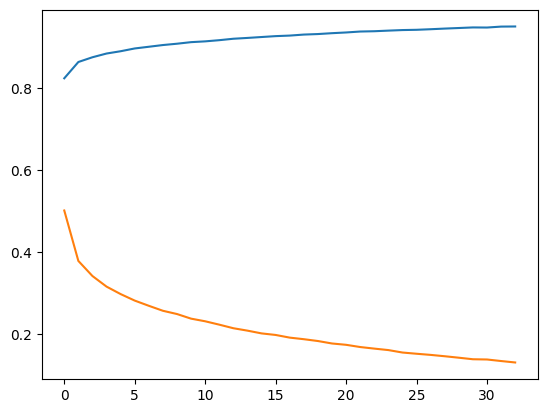

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])

In [10]:
loss,acc = model.evaluate(x_test,y_test)
acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.4446


0.8784999847412109